# Parkinson's Disease Dataset

Table of Contents:

1. Data Analysis
    - Data Description
    - Data Loading
    - Data Preprocessing
    - Exploratory Data Analysis (EDA)
    - Distribution Plots
    - Box Plots
    - Count Plots
    - Correlation Heatmap
2. Machine Learning Models
    - Model Selection
    - Model Evaluation
3. Conclusions

# 1. Data Analysis

### Data Description

(https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/data)

#### Patient Information
-------------------

##### Patient ID

-   PatientID: A unique identifier assigned to each patient (3058 to 5162).

##### Demographic Details

-   Age: The age of the patients ranges from 50 to 90 years.
-   Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
-   Ethnicity: The ethnicity of the patients, coded as follows:
    -   0: Caucasian
    -   1: African American
    -   2: Asian
    -   3: Other
-   EducationLevel: The education level of the patients, coded as follows:
    -   0: None
    -   1: High School
    -   2: Bachelor's
    -   3: Higher

##### Lifestyle Factors

-   BMI: Body Mass Index of the patients, ranging from 15 to 40.
-   Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
-   AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
-   PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
-   DietQuality: Diet quality score, ranging from 0 to 10.
-   SleepQuality: Sleep quality score, ranging from 4 to 10.

##### Medical History
---------------

-   FamilyHistoryParkinsons: Family history of Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
-   TraumaticBrainInjury: History of traumatic brain injury, where 0 indicates No and 1 indicates Yes.
-   Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
-   Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
-   Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
-   Stroke: History of stroke, where 0 indicates No and 1 indicates Yes.

##### Clinical Measurements
---------------------

-   SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
-   DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
-   CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
-   CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
-   CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
-   CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

##### Cognitive and Functional Assessments
------------------------------------

-   UPDRS: Unified Parkinson's Disease Rating Scale score, ranging from 0 to 199. Higher scores indicate greater severity of the disease.
-   MoCA: Montreal Cognitive Assessment score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
-   FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

##### Symptoms
--------

-   Tremor: Presence of tremor, where 0 indicates No and 1 indicates Yes.
-   Rigidity: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
-   Bradykinesia: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes.
-   PosturalInstability: Presence of postural instability, where 0 indicates No and 1 indicates Yes.
-   SpeechProblems: Presence of speech problems, where 0 indicates No and 1 indicates Yes.
-   SleepDisorders: Presence of sleep disorders, where 0 indicates No and 1 indicates Yes.
-   Constipation: Presence of constipation, where 0 indicates No and 1 indicates Yes.

##### Diagnosis Information
---------------------

-   Diagnosis: Diagnosis status for Parkinson's Disease, where 0 indicates No and 1 indicates Yes.

##### Confidential Information
------------------------

-   DoctorInCharge: This column contains confidential information about the doctor in charge, with "DrXXXConfid" as the value for all patients.

### Importing libraries and data

In [242]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

from scipy.stats import norm, skew, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### EDA and Preprocessing

In [243]:
#Loading data
data = pd.read_csv("parkinsons_disease_data.csv"); data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,6.296231,0,0,1,0,0,0,92,98,191.372707,98.730980,93.269555,161.291730,187.887925,28.634010,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,6.342325,1,0,0,0,0,0,103,96,150.188647,112.063230,47.524626,240.086616,172.325253,13.106537,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,9.740019,1,0,0,1,0,1,168,79,159.351155,61.543591,72.765698,222.231014,111.851581,26.527734,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,8.289390,0,0,0,0,0,0,129,97,232.240473,53.029891,99.945560,167.980928,144.474453,19.873404,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid


In [244]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [245]:
#Dropping useless column
data.drop("DoctorInCharge", axis=1, inplace=True)
#Check for missing values
data.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [246]:
data.shape

(2105, 34)

In [247]:
#Check for duplicates
data.duplicated().sum()

0

In [248]:
#Dropping duplicates, even though not needed
data.drop_duplicates(inplace=True)

In [249]:
#Removing outliers outside IQR (Inter-Quantile Range) on numerical columns
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - IQR * 1.5
        upper_bound = Q3 + IQR * 1.5
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [250]:
numerical_columns = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 
                     'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 
                     'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment']

In [251]:
data_cleaned = remove_outliers(data, numerical_columns); data_cleaned

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,6.296231,0,0,1,0,0,0,92,98,191.372707,98.730980,93.269555,161.291730,187.887925,28.634010,8.076254,1,0,0,0,1,1,0,0
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,6.342325,1,0,0,0,0,0,103,96,150.188647,112.063230,47.524626,240.086616,172.325253,13.106537,1.665751,0,0,0,1,0,1,1,1
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,9.740019,1,0,0,1,0,1,168,79,159.351155,61.543591,72.765698,222.231014,111.851581,26.527734,4.785614,0,0,0,0,1,1,0,1
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,8.289390,0,0,0,0,0,0,129,97,232.240473,53.029891,99.945560,167.980928,144.474453,19.873404,8.378979,1,0,1,0,0,1,1,1


In [252]:
#Check for skewed data columns and normalize as needed
#LATER

In [253]:
#One-hot encoding categorical columns
categorical_columns = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking' ,'FamilyHistoryParkinsons', 
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'Tremor', 
    'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 
    'Constipation', 'Diagnosis'
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

In [254]:
#Scale numerical features
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

In [255]:
data_cleaned

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,3058,1.328366,0,3,1,-1.053179,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,-0.178129,-1.773413,-0.092213,0.506438,-0.933115,1.122654,-1.678331,1.630256,-1.165038,1,0,0,0,0,0,0,0
1,3059,0.465684,0,0,2,-1.521172,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,1.105081,-0.835406,-0.375403,0.636191,0.751444,0.409290,-1.133101,-0.319603,-0.068916,0,1,0,1,0,1,0,1
2,3060,0.034343,1,0,0,-1.643161,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,-0.781992,0.161227,1.388905,-0.171563,1.109247,1.695488,-0.593466,1.716646,-0.974713,1,0,0,0,1,0,1,1
3,3061,-1.518484,0,0,0,-1.631183,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,0.463476,-0.718155,1.227165,0.233919,-0.333858,1.366909,-0.856351,0.718665,-0.544940,1,1,1,0,0,0,1,1
4,3062,1.500903,0,0,1,-1.192477,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,-0.706509,0.219852,1.311486,-0.407828,-1.480864,-0.716430,-1.407092,-0.782083,-0.609825,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,1.500903,1,0,2,1.564494,0,12.674393,5.325900,5.947278,6.296231,0,0,1,0,0,0,-1.574563,0.454354,-0.814339,-0.631773,1.437992,-0.605161,1.528379,1.566920,1.052291,1,0,0,0,1,1,0,0
2101,5159,-0.224461,0,0,1,0.899883,1,0.977018,0.108599,4.825187,6.342325,1,0,0,0,0,0,-1.159407,0.337103,-1.759382,-0.324555,-0.519817,0.168311,1.253313,-0.230041,-1.133222,0,0,0,1,0,1,1,1
2102,5160,-0.396998,0,0,2,-0.607775,0,6.152286,5.775103,0.334244,9.740019,1,0,0,1,0,1,1.293788,-0.659529,-1.549132,-1.488690,0.560460,-0.006965,0.184458,1.323165,-0.069576,0,0,0,0,1,1,0,1
2103,5161,-0.742070,1,0,0,-1.434625,1,0.292094,2.280475,9.598513,8.289390,0,0,0,0,0,0,-0.178129,0.395729,0.123445,-1.684873,1.723714,-0.539498,0.761058,0.553074,1.155498,1,0,1,0,0,1,1,1


In [256]:
#Statisticial summary of data
pd.set_option('display.max_columns', None)
data_cleaned.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2.105000e+03,2105.000000,2105.000000,2105.000000,2.105000e+03,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,4.725700e-17,0.492637,0.692637,1.337292,-3.864947e-16,0.296437,10.040413,5.016674,4.912901,6.996639,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,-2.497870e-16,2.329095e-16,-4.556925e-16,1.282690e-16,-6.751000e-18,1.679311e-16,-1.383955e-16,1.299567e-16,2.700400e-16,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,1.000238e+00,0.500065,1.003827,0.895840,1.000238e+00,0.456795,5.687014,2.890919,2.872115,1.753065,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,-1.691021e+00,0.000000,0.000000,0.000000,-1.693104e+00,0.000000,0.002228,0.004157,0.000011,4.000497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.650046e+00,-1.773413e+00,-1.762272e+00,-1.754165e+00,-1.696629e+00,-1.696517e+00,-1.791984e+00,-1.744380e+00,-1.700608e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,-8.283386e-01,0.000000,0.000000,1.000000,-8.918918e-01,0.000000,5.150278,2.455703,2.478503,5.488864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.952167e-01,-8.940313e-01,-8.599467e-01,-8.596478e-01,-8.616046e-01,-8.875910e-01,-8.548759e-01,-8.768879e-01,-8.774791e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,3.434335e-02,0.000000,0.000000,1.000000,-3.458318e-03,0.000000,10.070337,5.031550,4.825187,6.929819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.716309e-02,4.397606e-02,3.826188e-02,1.697622e-02,-1.399486e-02,-1.355116e-03,2.025001e-02,-1.513018e-02,-2.204986e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,8.970253e-01,1.000000,1.000000,2.000000,8.676969e-01,1.000000,14.829565,7.512795,7.381487,8.558719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.786320e-01,8.647325e-01,8.661790e-01,8.702252e-01,8.429688e-01,8.712791e-01,8.557453e-01,8.695849e-01,8.504511e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,1.673439e+00,1.000000,3.000000,3.000000,1.774869e+00,1.000000,19.988866,9.995255,9.995864,9.999821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.708944e+00,1.685489e+00,1.677463e+00,1.701468e+00,1.725285e+00,1.737820e+00,1.723961e+00,1.721544e+00,1.705659e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
#Exploring possible correlations between data categories and diagnosis status
data_cleaned.iloc[:,:34].corr().iloc[[-1]]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
Diagnosis,-0.043508,0.065344,0.016835,-0.005068,0.004557,0.030114,0.005241,0.036699,0.01294,-0.022992,-0.043295,0.013363,0.022964,-0.011587,0.057067,0.05908,0.028093,-0.004413,-0.029074,-0.019001,0.014707,-0.019626,0.01561,0.398006,-0.173104,-0.225036,0.27437,0.185611,0.184042,0.147519,-0.01222,-0.010578,0.025327,1.0


...which shows that there are no strong independent correlations. Of all variables, Tremors are the most indicative of a Parkinsons' disease diagnosis, having a Pearson correlation coefficient of value r = 0.27 (weak positive correlation).

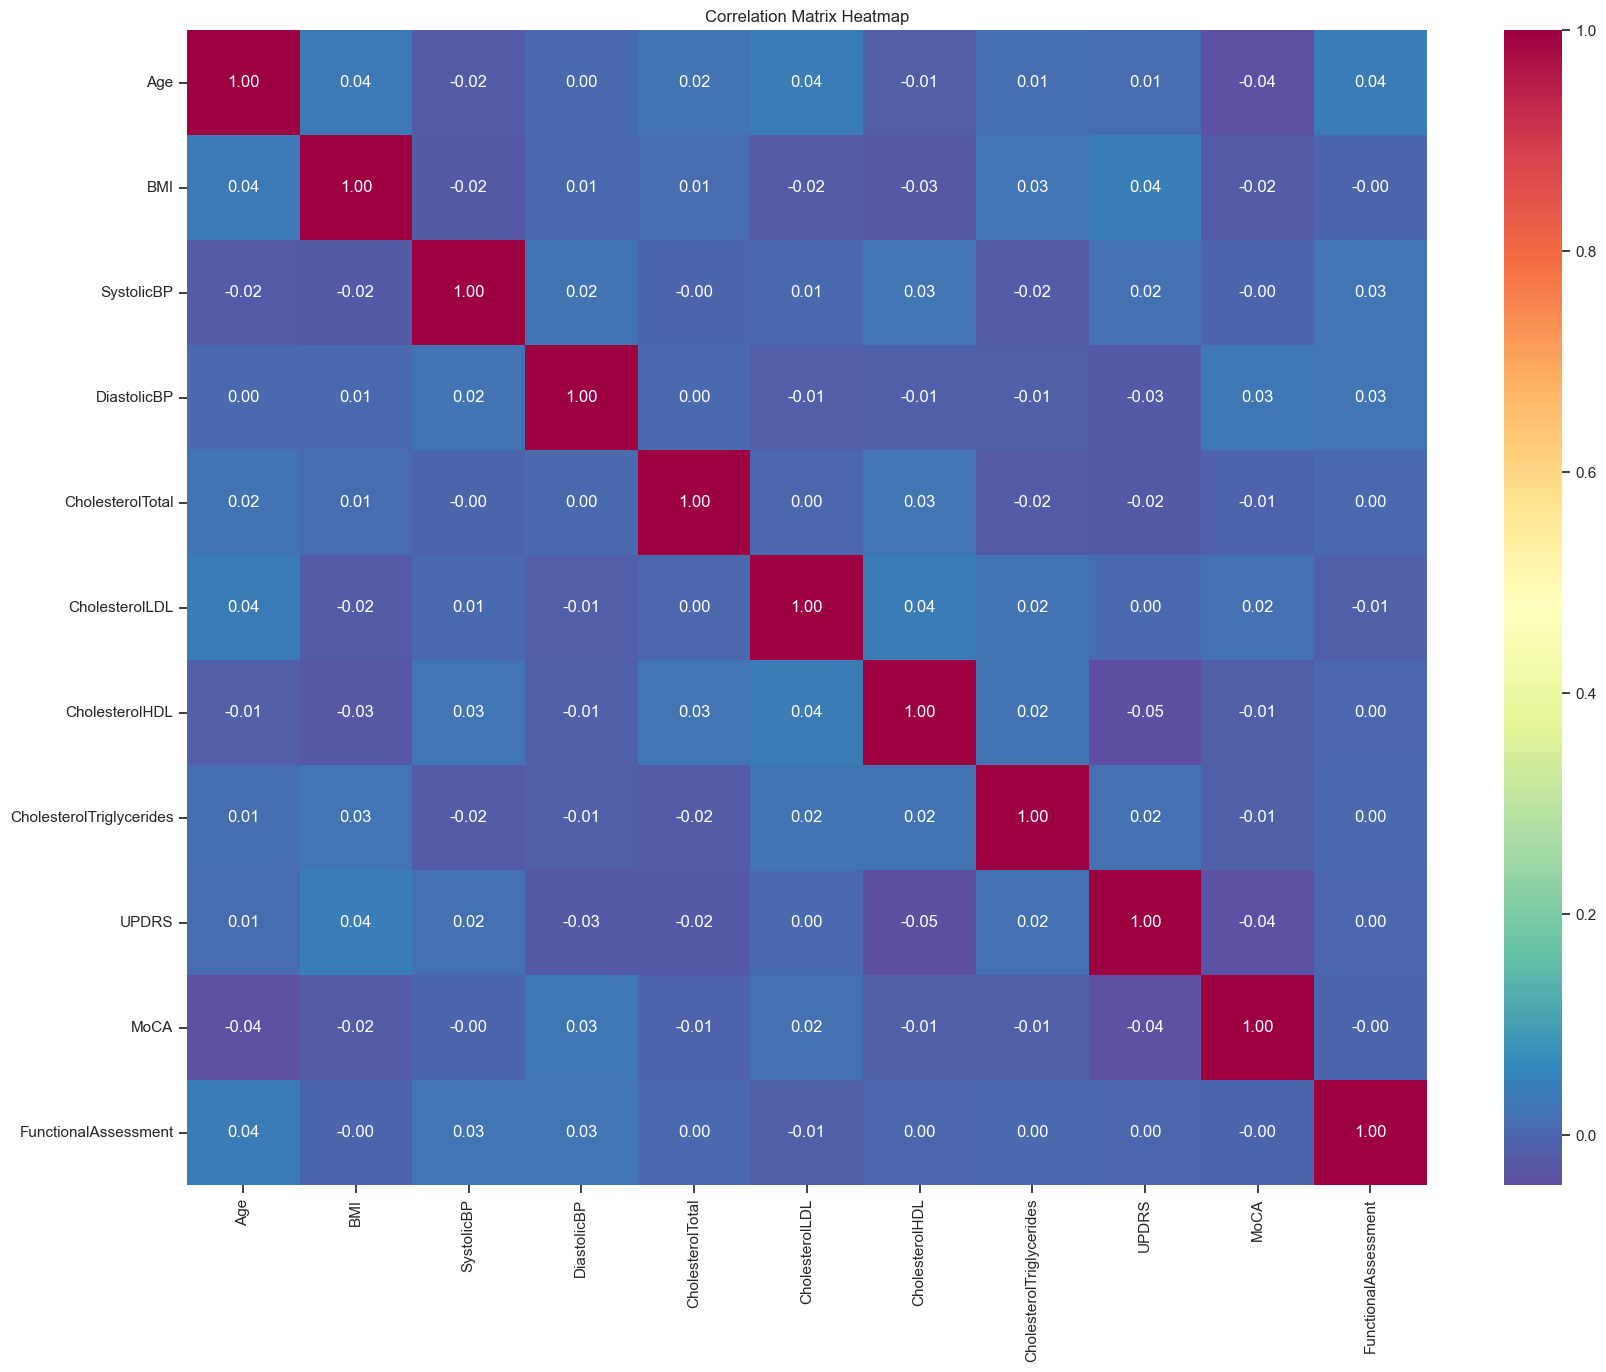

In [258]:
#Full correlation matrix in correlation heatmap form (for numerical columns)
fig = plt.figure(figsize=(20,15))
sns.heatmap(data_cleaned[numerical_columns].corr(), annot=True, fmt='.2f', cmap ='Spectral_r')
plt.title("Correlation Matrix Heatmap")
plt.savefig('images/01_CorrHeatmap.png', bbox_inches='tight')
plt.show()

### Visualizing the relationship between different categories and diagnosis status 

#### Gender - Diagnosis

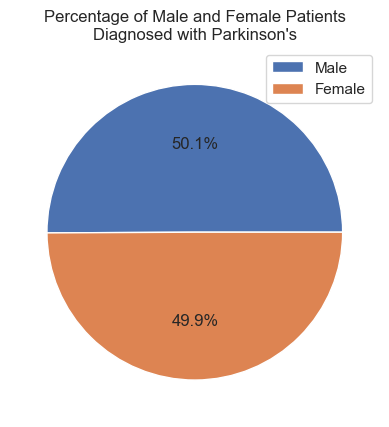

In [259]:
data_diagnosed = data_cleaned[data_cleaned["Diagnosis"] == 1].copy()
data_undiagnosed = data_cleaned[data_cleaned["Diagnosis"] == 0].copy()
data_diagnosed["Gender"].value_counts().plot(kind="pie", labels=['',''], autopct='%1.1f%%')
plt.legend(labels = ['Male','Female'])
plt.ylabel('')
plt.title("Percentage of Male and Female Patients\nDiagnosed with Parkinson's")
plt.savefig('images/01_Gender_Diagnosis_pie.png', bbox_inches='tight')
plt.show()

This is not indicative of any strong correlation between gender and disease.

#### Constipation - Diagnosis

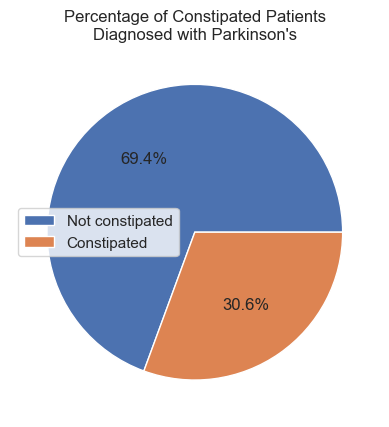

In [260]:
data_pos = data_cleaned[data_cleaned["Diagnosis"] == 1]
data_pos["Constipation"].value_counts().plot(kind="pie", labels=['',''], autopct='%1.1f%%')
plt.legend(labels = ['Not constipated','Constipated'])
plt.ylabel('')
plt.title("Percentage of Constipated Patients\nDiagnosed with Parkinson's")
plt.savefig('images/01_Constipation_Diagnosis_pie.png', bbox_inches='tight')
plt.show()

#### Smoking - Diagnosis

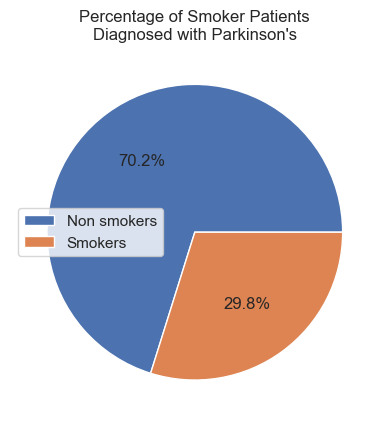

In [261]:
data_pos = data_cleaned[data_cleaned["Diagnosis"] == 1]
data_pos["Smoking"].value_counts().plot(kind="pie", labels=['',''], autopct='%1.1f%%')
plt.legend(labels = ['Non smokers','Smokers'])
plt.ylabel('')
plt.title("Percentage of Smoker Patients\nDiagnosed with Parkinson's")
plt.savefig('images/01_Smoking_Diagnosis_pie.png', bbox_inches='tight')
plt.show()

#### Tremor - Diagnosis

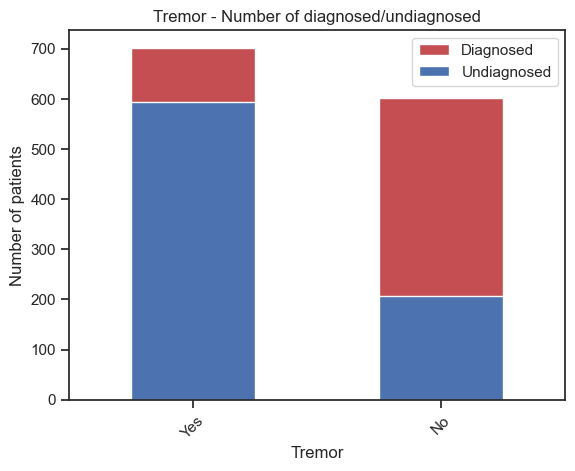

In [262]:
fig, ax = plt.subplots()
data_diagnosed["Tremor"].value_counts().plot(kind='bar', color='r', stacked=False)
data_undiagnosed["Tremor"].value_counts().plot(kind='bar', color='b', stacked=False)
plt.legend(labels=["Diagnosed", "Undiagnosed"])
plt.xlabel("Tremor", rotation='horizontal')
plt.xticks(ticks=[0,1], labels=["Yes", "No"], minor=False, rotation=45)
plt.ylabel("Number of patients")
plt.title("Tremor - Number of diagnosed/undiagnosed")
plt.savefig('images/01_Tremor_Dianosis.png', bbox_inches='tight')
plt.show()

In the diagnosed and undiagnosed groups, the ratios of the number of patients with tremors and without them is, respectively:

In [263]:
ratio_diagnosed = 702/602
ratio_undiagnosed = 594/207
print(f'ratio_diagnosed: {ratio_diagnosed}\nratio_undiagnosed: {ratio_undiagnosed}')

ratio_diagnosed: 1.1661129568106312
ratio_undiagnosed: 2.869565217391304


... which is quite significant. Keeping in mind the already discovered tremor-diagnosis correlation of around 0.27, this category is expected to play a relatively significant role in disease prediction.

#### Speech Problems - Diagnosis

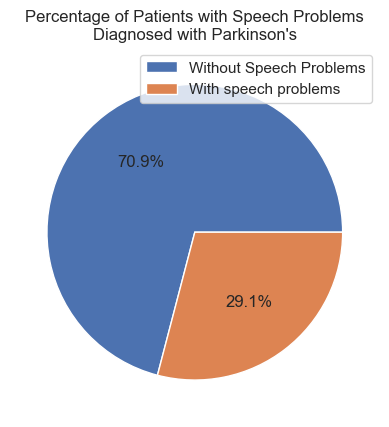

In [264]:
data_speech = data_cleaned[data_cleaned["Diagnosis"] == 1]
data_speech["SpeechProblems"].value_counts().plot(kind="pie", labels=['',''], autopct='%1.1f%%')
plt.legend(labels = ['Without Speech Problems','With speech problems'])
plt.ylabel('')
plt.title("Percentage of Patients with Speech Problems\nDiagnosed with Parkinson's")
plt.savefig('images/01_Speech_Diagnosis_pie.png', bbox_inches='tight')
plt.show()

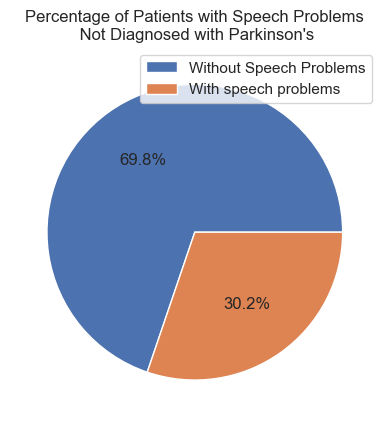

In [265]:
data_speech = data_cleaned[data_cleaned["Diagnosis"] == 0]
data_speech["SpeechProblems"].value_counts().plot(kind="pie", labels=['',''], autopct='%1.1f%%')
plt.legend(labels = ['Without Speech Problems','With speech problems'])
plt.ylabel('')
plt.title("Percentage of Patients with Speech Problems\n Not Diagnosed with Parkinson's")
plt.savefig('images/01_Speech_Diagnosis_pie.png', bbox_inches='tight')
plt.show()

In both the diagnosed and undiagnosed group, the ratio of the number of patients without speech problems and of those with speech numbers in quite similar:

In [266]:
ratio_diagnosed = 70.9 / 29.1
ratio_undiagnosed = 69.8/30.2
print(f'ratio_diagnosed: {ratio_diagnosed}\nratio_undiagnosed: {ratio_undiagnosed}')

ratio_diagnosed: 2.436426116838488
ratio_undiagnosed: 2.3112582781456954


### Distribution Plots


In [267]:
len(numerical_columns)

11

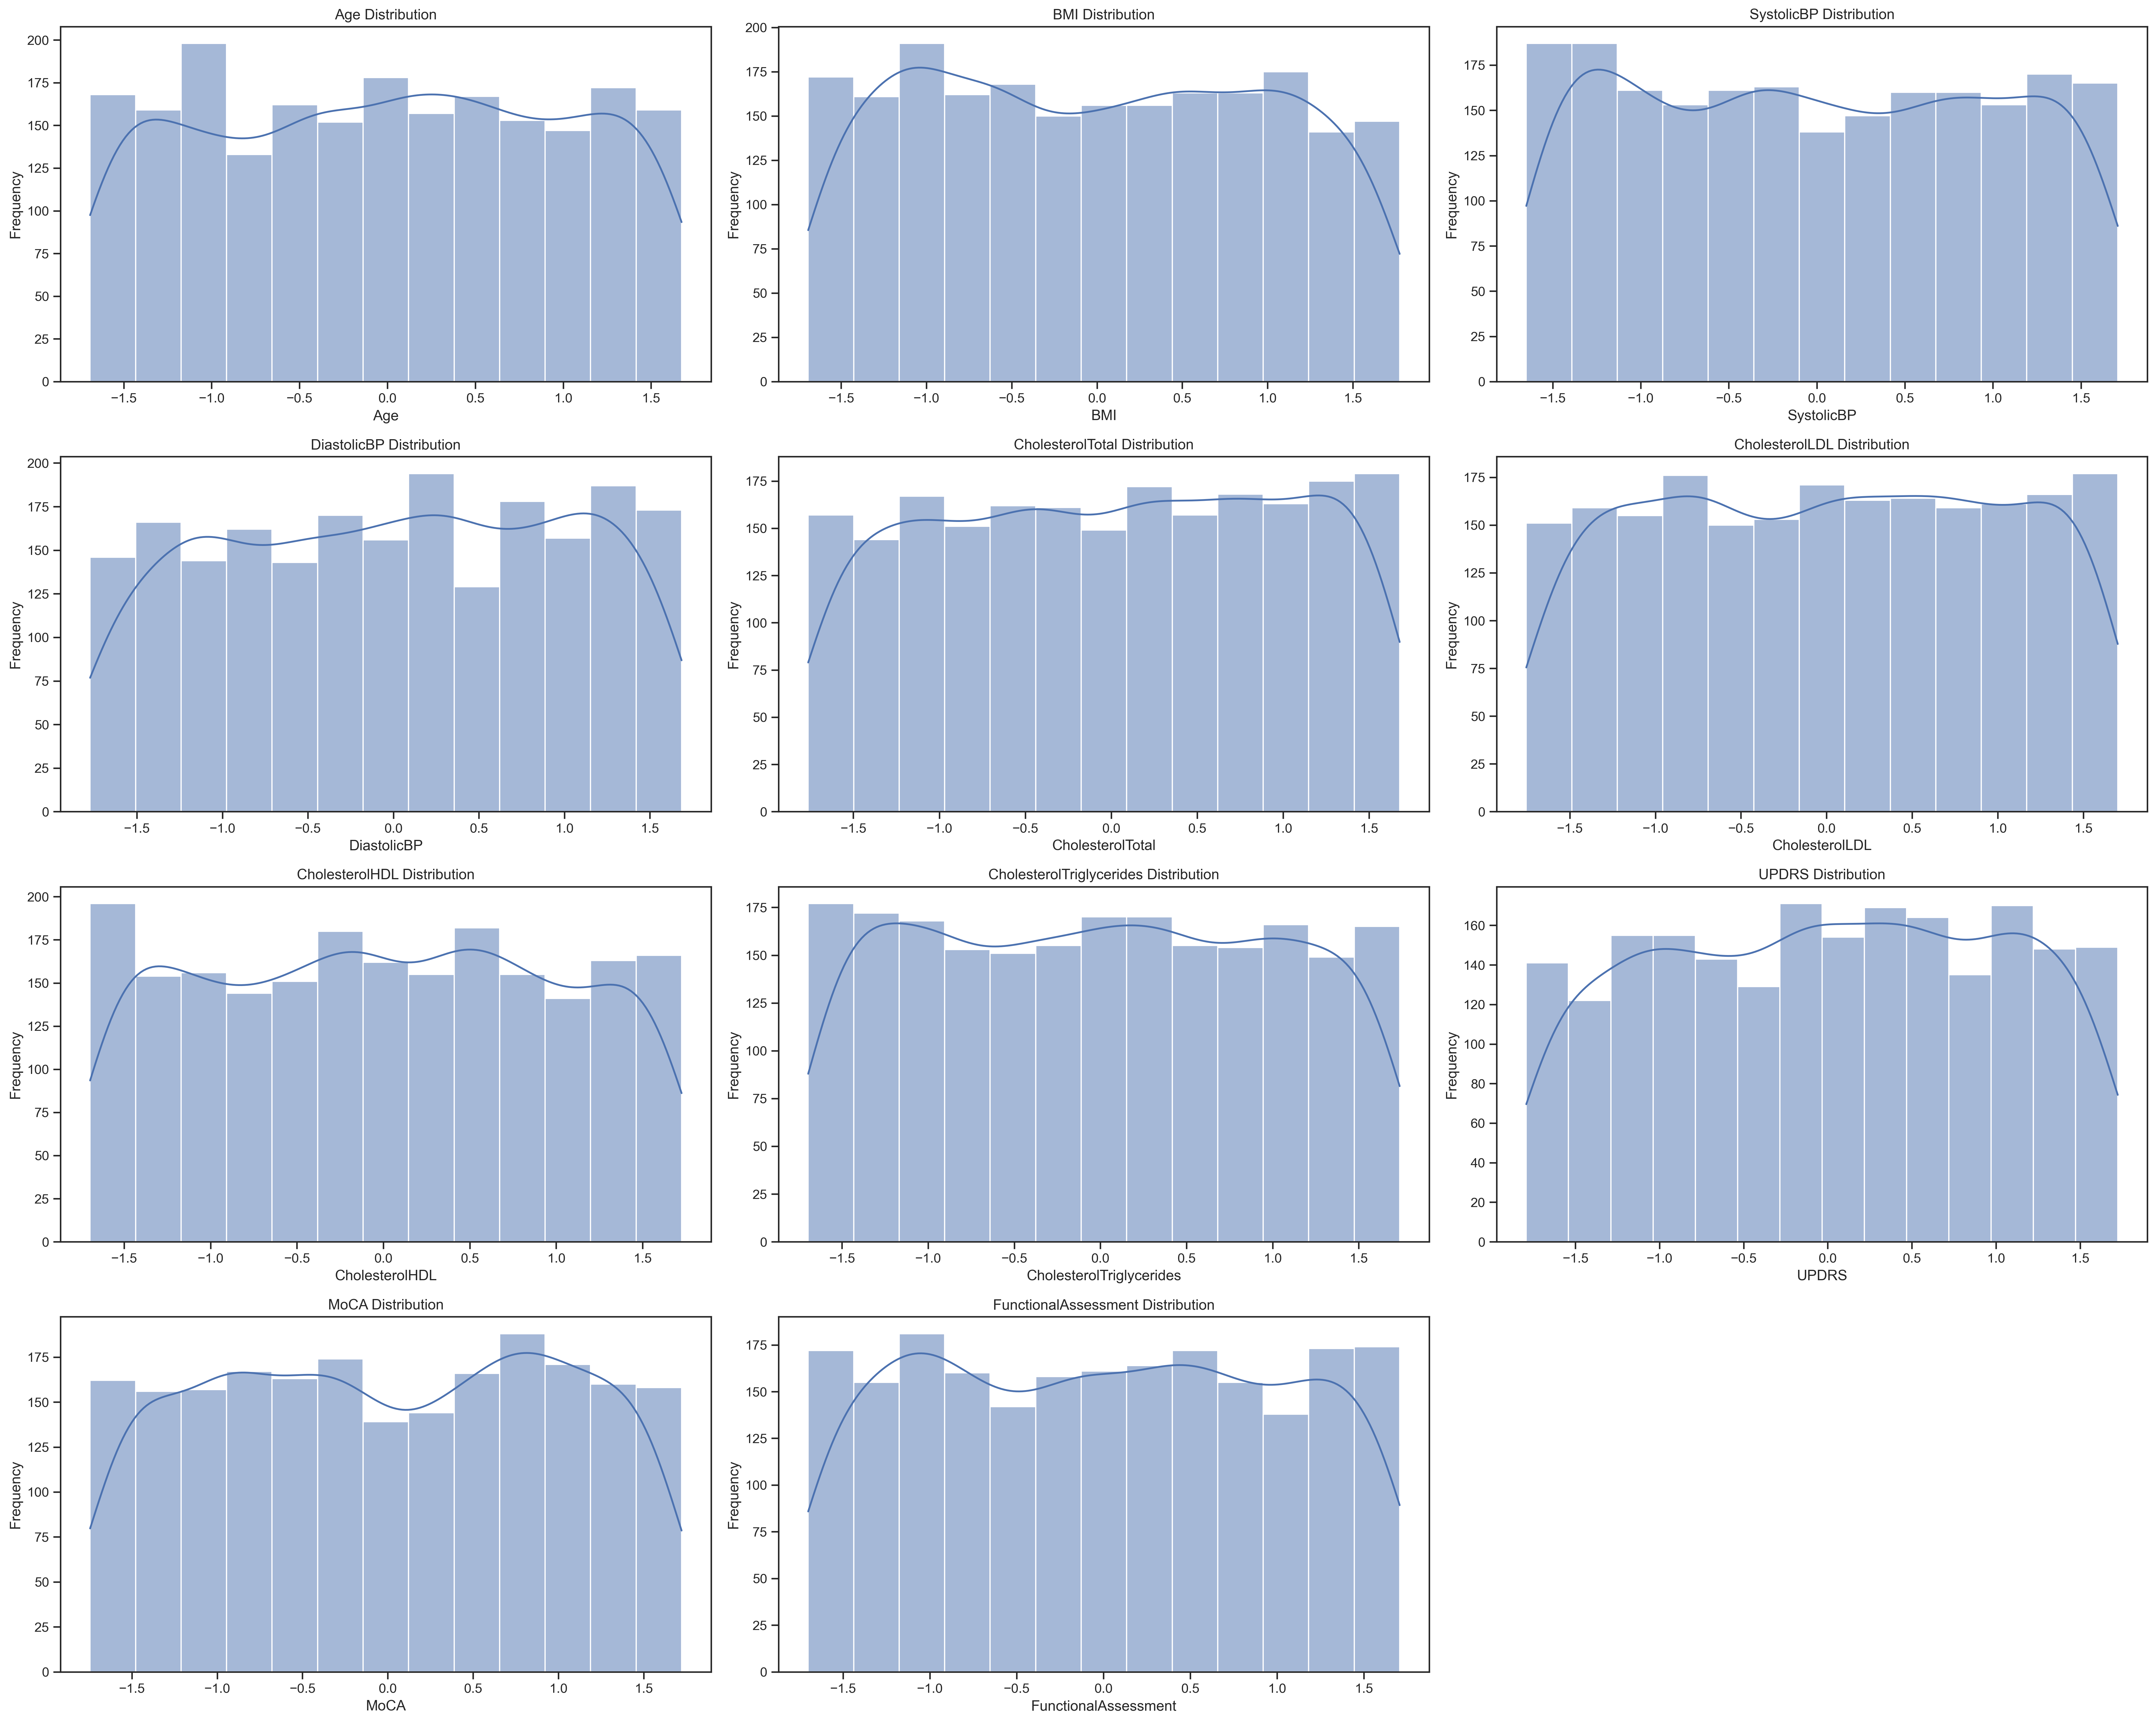

In [268]:
fig= plt.figure(figsize=(25,20), dpi=300)
for i, col in enumerate(numerical_columns):
    plt.subplot(4,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.histplot(data_cleaned[col], kde=True)
    plt.ylabel("Frequency")
    plt.title(f'{col} Distribution')

plt.savefig('images/01_Distributions.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

### Feature Boxplots Grouped by Diagnosis (all features)

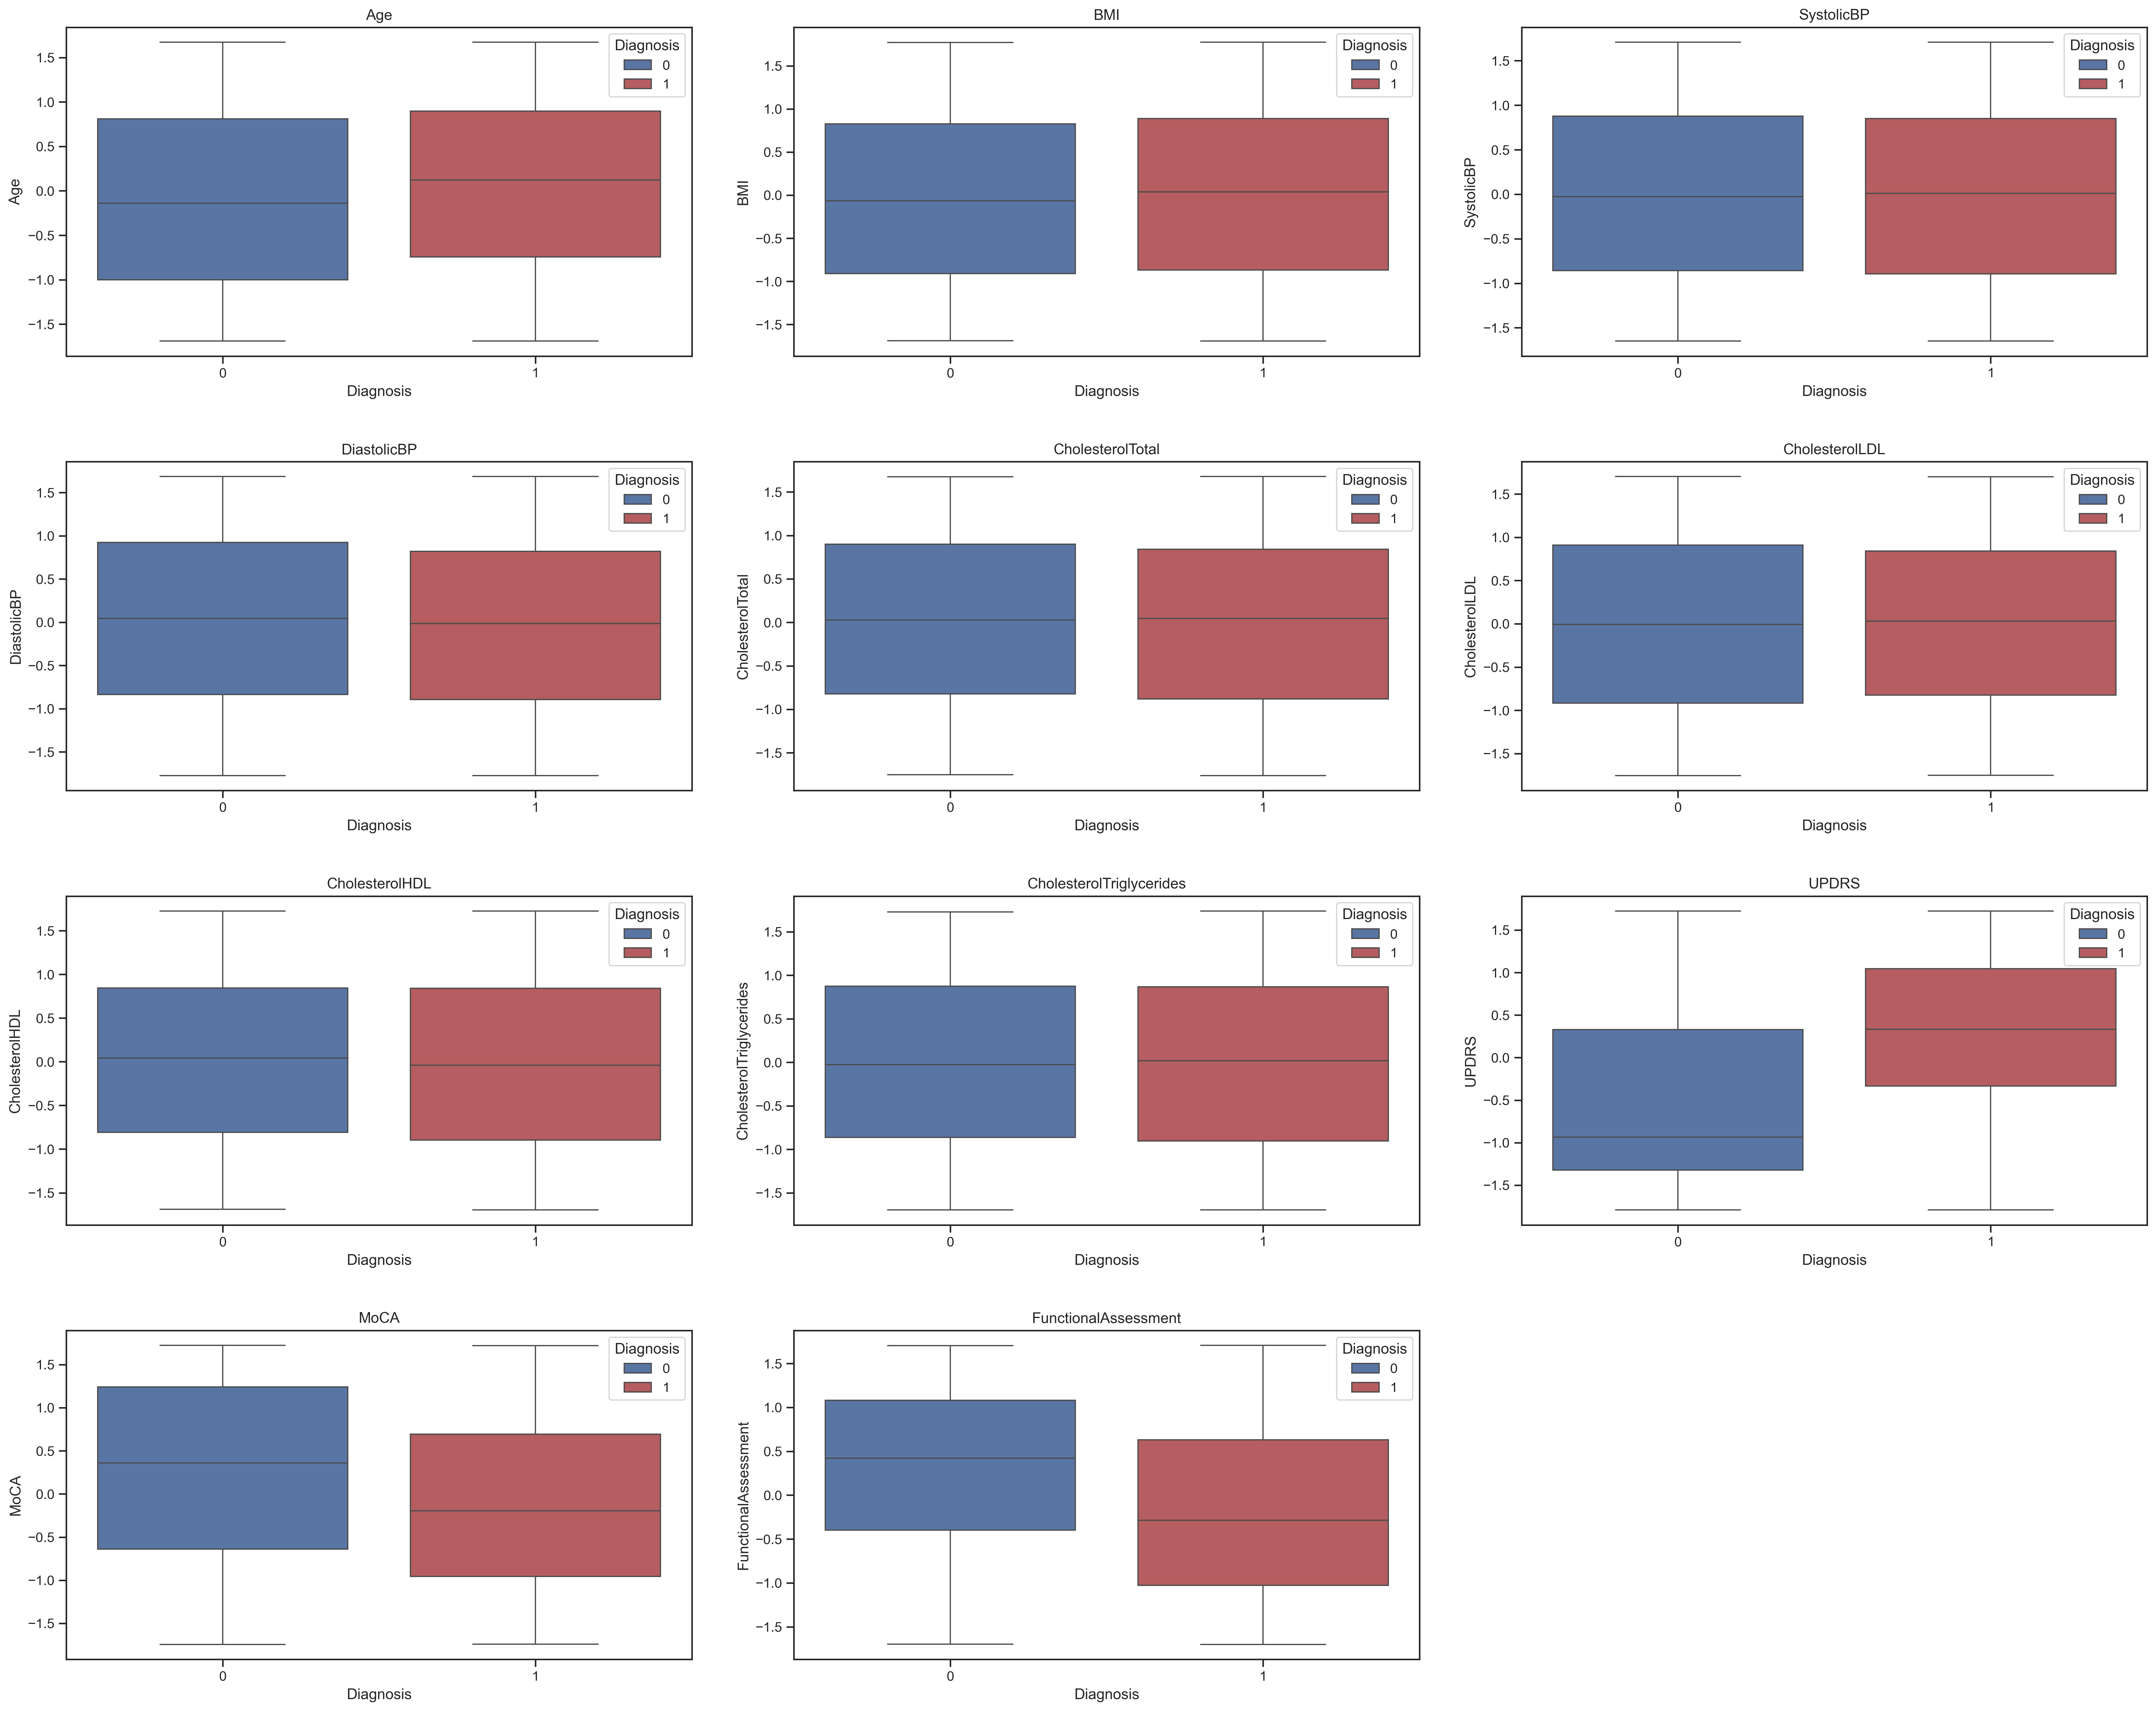

In [269]:
fig= plt.figure(figsize=(25,20), dpi=300)
for i, col in enumerate(numerical_columns):
    plt.subplot(4,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.boxplot(x='Diagnosis', y=col, data=data_cleaned, hue="Diagnosis", palette=["b", "r"])
    plt.title(f'{col}')

plt.savefig('images/01_BoxPlots.png', bbox_inches='tight')
plt.tight_layout(pad=3)
plt.show()

### Feature Count Plots Grouped by Diagnosis (all features)

In [270]:
len(categorical_columns)

18

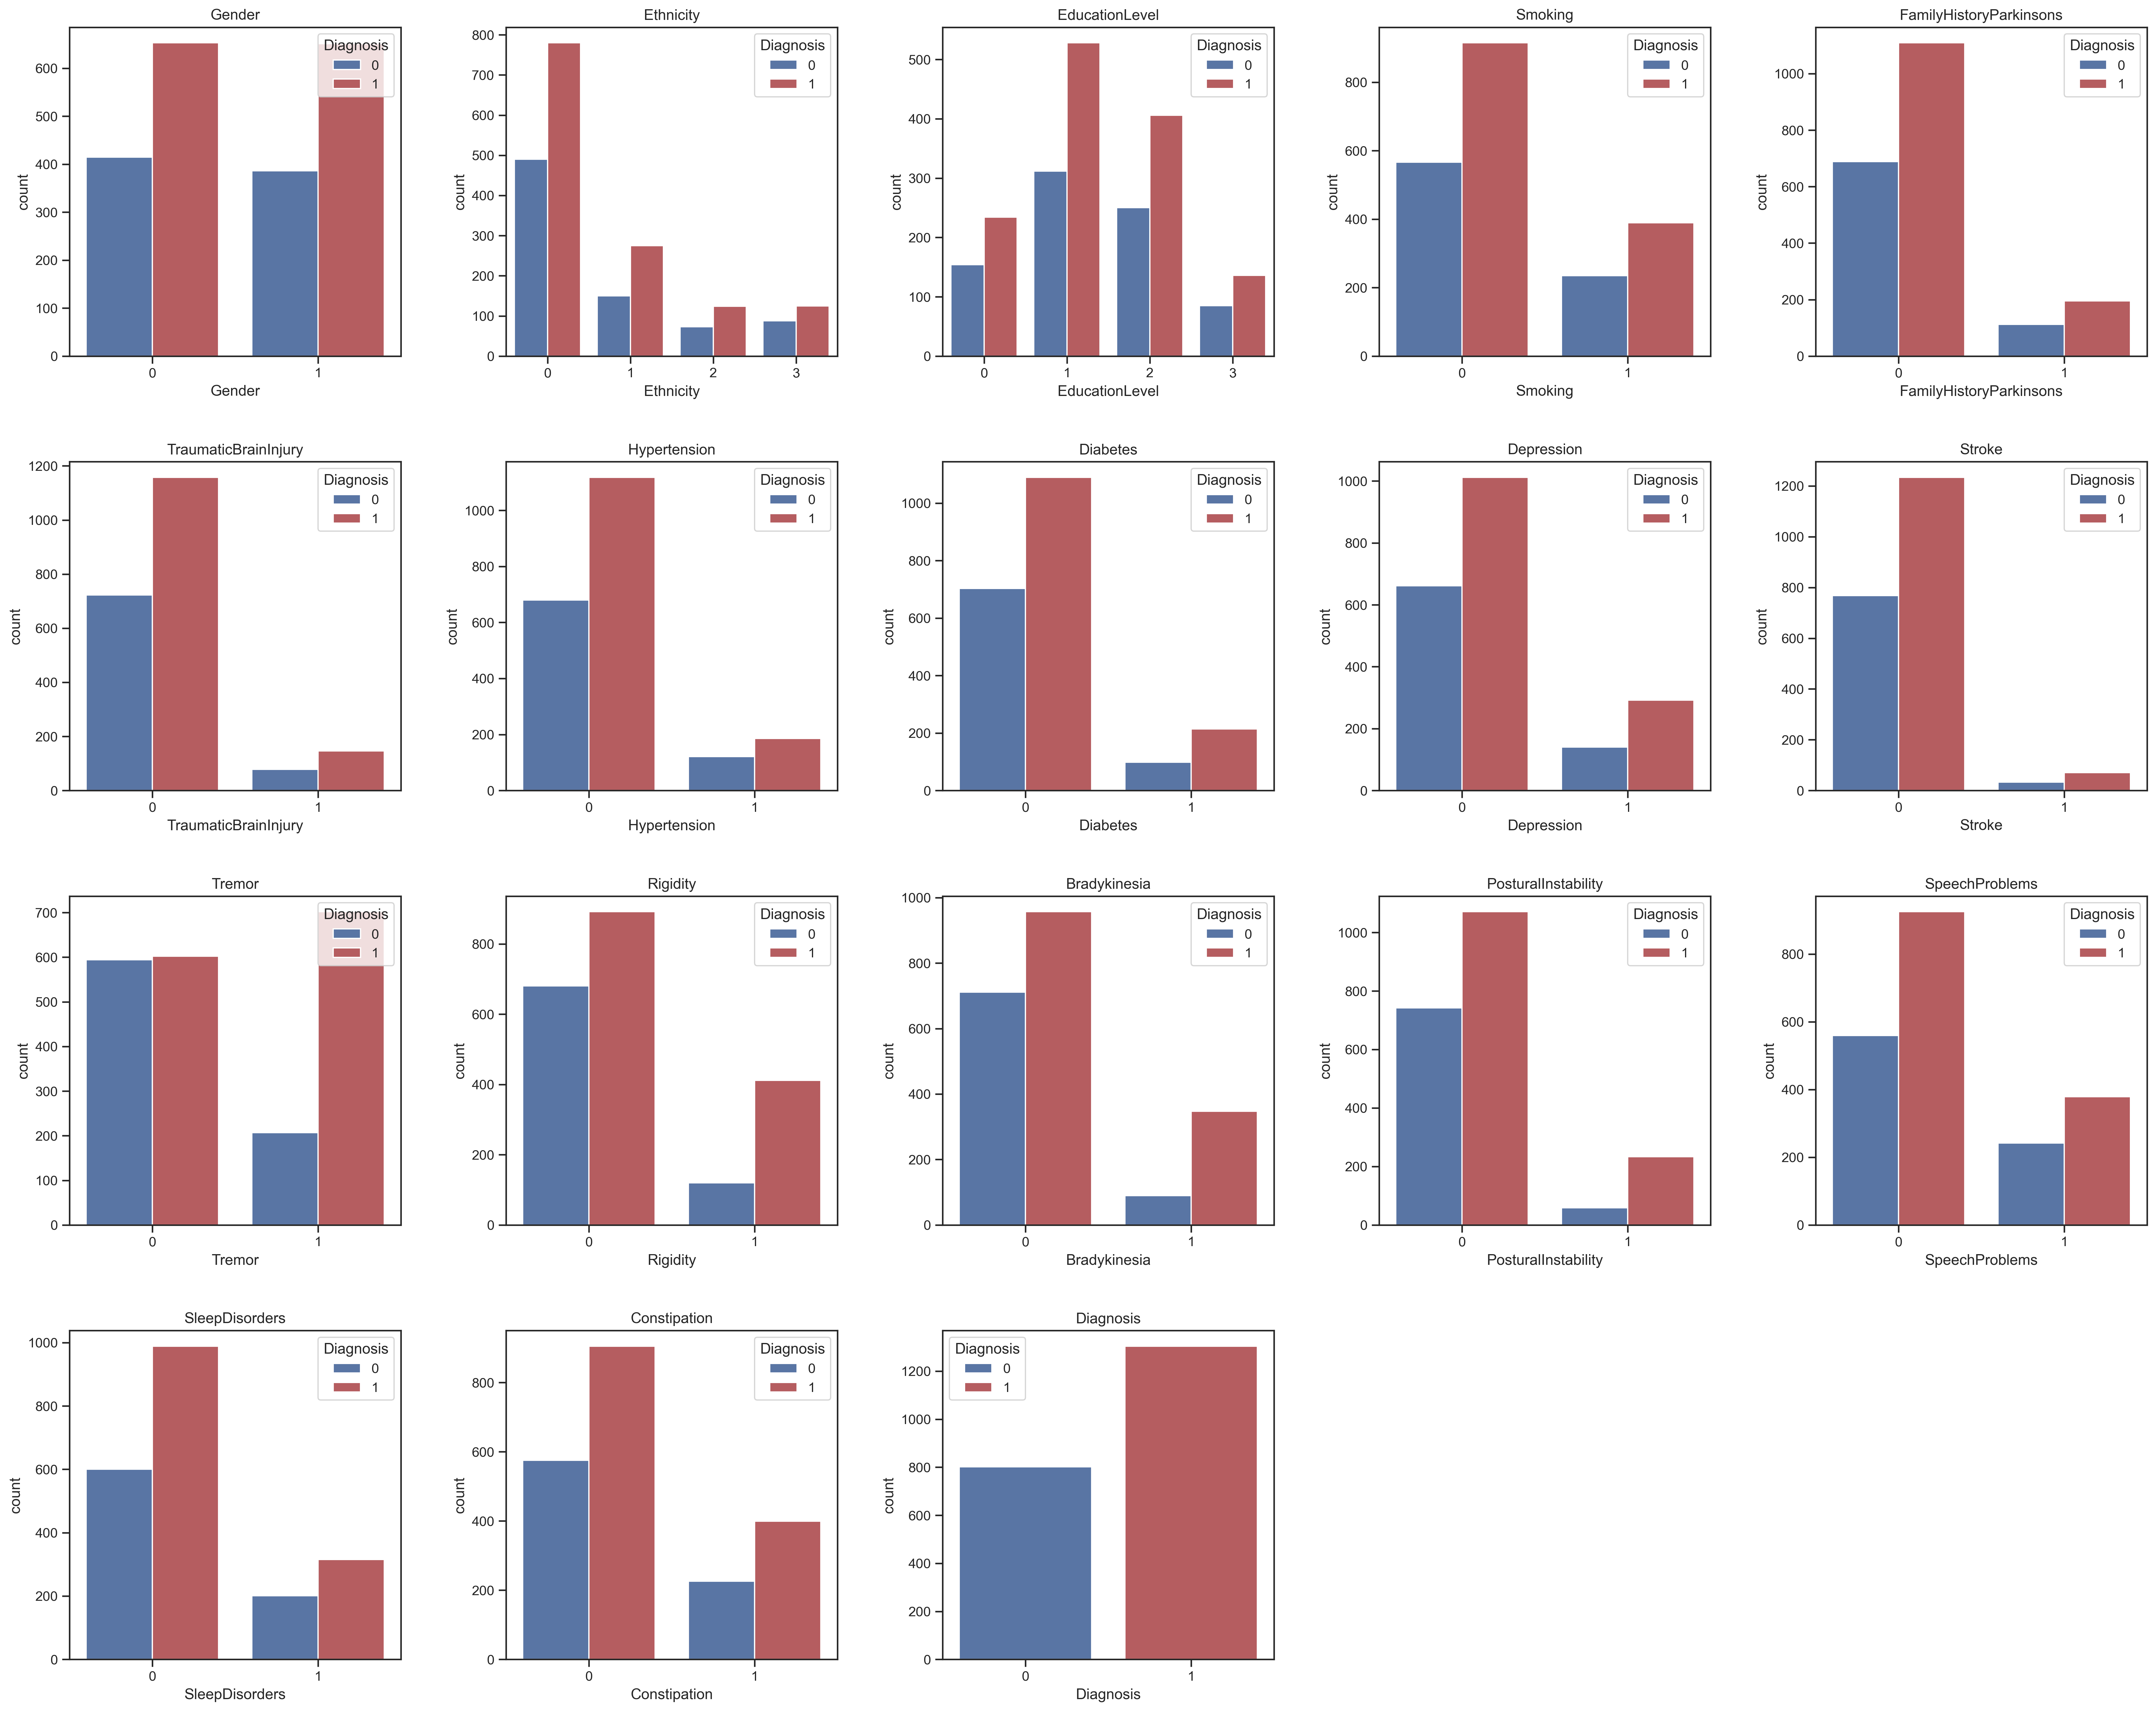

In [271]:
fig= plt.figure(figsize=(25,20), dpi=300)
for i, col in enumerate(categorical_columns):
    plt.subplot(4,5, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.countplot(x=col, data=data_cleaned, hue="Diagnosis", palette=["b", "r"])
    plt.title(f'{col}')

plt.savefig('images/01_CountPlots.png', bbox_inches='tight')
plt.tight_layout(pad=3)
plt.show()

It is clearly not easy to find by eye any substantial correlation between the features in the table and the final diagnosis of Parkinson's disease. Because of this, in the next section, we will make use of Machine Learning algorithms to try and make accurate predictions.

# 2. Machine Learning Models

The machine learning models we will use and evaluate are:
- Logistic Regression
- Neural Network (Multi Layer Percerpton Classifier: MLPC)
- Decision Tree
- Random Forest
- XGBoost

from the SciKit Learn and ---- libraries.

In [272]:
#Splitting data into train, cross-validation, and test set
X = data_cleaned.drop("Diagnosis", axis=1)
y = data_cleaned["Diagnosis"]

In [273]:
X.shape

(2105, 33)

In [274]:
X_train, X_left, y_train, y_left = train_test_split(X, y, train_size=0.6, random_state=28)
X_CV, X_test, y_CV, y_test = train_test_split(X_left, y_left, train_size=0.5, random_state=28)

In [275]:
print(f'Train set shape: {X_train.shape}\nCross-Validation set shape: {X_CV.shape}\nTest set shape: {X_test.shape}')

Train set shape: (1263, 33)
Cross-Validation set shape: (421, 33)
Test set shape: (421, 33)


In [276]:
#Defining all models at once
models = {
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Neural Network" : MLPClassifier(max_iter=1500),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier(n_estimators = 500, learning_rate=0.1, verbosity=0, random_state=28)
}

In [277]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_CV_pred = model.predict(X_CV)
    #y_test_pred = model.predict(X_test)

    results.append({
        'Model' : model_name,
        'CV Accuracy' : accuracy_score(y_CV, y_CV_pred),
        'CV Precision' : precision_score(y_CV, y_CV_pred),
        'CV Recall' : recall_score(y_CV, y_CV_pred),
        'CV F1 Score' : f1_score(y_CV, y_CV_pred)

    })

results_df = pd.DataFrame(results)

c:\Users\jom4n\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [278]:
results_df

,Model,CV Accuracy,CV Precision,CV Recall,CV F1 Score
0,Logistic Regression,0.805226,0.829091,0.866920,0.847584
1,Neural Network,0.624703,0.624703,1.000000,0.769006
2,Decision Tree,0.888361,0.902985,0.920152,0.911488
3,Random Forest,0.914489,0.906810,0.961977,0.933579
4,XGBoost,0.928741,0.914591,0.977186,0.944853


Upon testing our model on the cross-validation set, we notice that the Logistic Regression model failed to converge. This is likely due to:
- the value of max_iter (maximum iterations) being too small 
- skewed distributions of numerical data categories are degrading the performance of the algorithm

In [279]:
#Checking and potentially fixing skewed distributions of numerical variables using a log transformation
def normalize_skewness(df, columns):
    for i, col in enumerate(columns):
        pt = PowerTransformer(method='log')
        for col in columns:
            if abs(skew(df[col])) > 0.5:
                df[col] = pt.fit_transform(df[col])
    return df

data_cleaned_normalized = normalize_skewness(data_cleaned, numerical_columns)



In [280]:
#Testing models on skew-normalized data
X2 = data_cleaned_normalized.drop("Diagnosis", axis=1)
y2 = data_cleaned_normalized["Diagnosis"]
X_train2, X_left2, y_train2, y_left2 = train_test_split(X2, y2, train_size=0.6, random_state=28)
X_CV2, X_test2, y_CV2, y_test2 = train_test_split(X_left2, y_left2, train_size=0.5, random_state=28)

models2 = {
    "Logistic Regression" : LogisticRegression(max_iter=3049),
    "Neural Network" : MLPClassifier(max_iter=1500),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier(n_estimators = 500, learning_rate=0.1, verbosity=1, random_state=28)
}

results2 = []
for model_name, model in models2.items():
    model.fit(X_train2, y_train2)
    y_CV_pred2 = model.predict(X_CV2)
    y_test_pred2 = model.predict(X_test2)

    results2.append({
        'Model' : model_name,
        'CV Accuracy' : accuracy_score(y_CV2, y_CV_pred2),
        'CV Precision' : precision_score(y_CV2, y_CV_pred2),
        'CV Recall' : recall_score(y_CV2, y_CV_pred2),
        'CV F1 Score' : f1_score(y_CV2, y_CV_pred2)

    })

results_df2 = pd.DataFrame(results2)

The Logistic Regression model converges in exactly 3049 iterations (trial and error method).

In [281]:
results_df2

,Model,CV Accuracy,CV Precision,CV Recall,CV F1 Score
0,Logistic Regression,0.805226,0.829091,0.866920,0.847584
1,Neural Network,0.624703,0.624703,1.000000,0.769006
2,Decision Tree,0.895487,0.904059,0.931559,0.917603
3,Random Forest,0.916865,0.913043,0.958175,0.935065
4,XGBoost,0.928741,0.914591,0.977186,0.944853


Finally, after fine-tuning our models on the cross-validation set, we definitively evaluate them on the test set:

In [282]:
results_test = []
for model_name, model in models2.items():
    model.fit(X_train2, y_train2)
    y_test_pred2 = model.predict(X_test2)

    results_test.append({
        'Model' : model_name,
        'Test Accuracy' : accuracy_score(y_test2, y_test_pred2),
        'Test Precision' : precision_score(y_test2, y_test_pred2),
        'Test Recall' : recall_score(y_test2, y_test_pred2),
        'Test F1 Score' : f1_score(y_test2, y_test_pred2)

    })

results_test_df = pd.DataFrame(results_test).sort_values(by='Test F1 Score', ascending=False); results_test_df

,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score
4,XGBoost,0.916865,0.904215,0.959350,0.930966
3,Random Forest,0.893112,0.891051,0.930894,0.910537
2,Decision Tree,0.847981,0.852713,0.894309,0.873016
0,Logistic Regression,0.798100,0.815686,0.845528,0.830339
1,Neural Network,0.724466,0.727273,0.845528,0.781955


Which shows that the XGBoost model outperforms all the other Machine Learning algorithms in all evaluation metrics.

# 3. Conclusions
- Exploratory Data Analysis showed there exists at least some correlation between several health metrics and diagnosis status. These correlations are not at all obvious to the naked eye.
- Machine Learning Modelling has shown itself capable in reliably predicting diagnosis status based on several biomarkers; more particularly, the Extreme Gradient Boosting (XGBoost) learning algorithm has outperformed all other algorithms in all relevant algorithm evaluation metrics.